In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import random 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from pandas.plotting import table

import warnings
warnings.filterwarnings("ignore")
import itertools
import scipy.stats as ss


In [104]:
df_raw = pd.read_excel("df2.xlsx")

In [105]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66510 entries, 0 to 66509
Data columns (total 23 columns):
no_cnt_crypte    66510 non-null int64
no_par_crypte    66510 non-null int64
ty_pp            66510 non-null object
genre_veh        66510 non-null object
produit          66510 non-null object
QUAL_VEH         66510 non-null object
IND_CLI_RNVA     66510 non-null object
CSP              66510 non-null int64
ETAT_CIVIL       66510 non-null object
ind_fch_fcc      66510 non-null object
copot_           66510 non-null int64
pan_dir_         66510 non-null int64
secteur_         66510 non-null object
imp_reg          66510 non-null object
fichage          66510 non-null int64
bdf_cote         66510 non-null int64
duree_cl         66510 non-null int64
pc_appo2         66510 non-null int64
age2             66510 non-null int64
mt_rev2          66510 non-null int64
part_loyer2      66510 non-null int64
anc_emp2         66510 non-null int64
WE18             66510 non-null int64
dtypes: 

In [106]:
df = df_raw.iloc[:,2:-1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66510 entries, 0 to 66509
Data columns (total 20 columns):
ty_pp           66510 non-null object
genre_veh       66510 non-null object
produit         66510 non-null object
QUAL_VEH        66510 non-null object
IND_CLI_RNVA    66510 non-null object
CSP             66510 non-null int64
ETAT_CIVIL      66510 non-null object
ind_fch_fcc     66510 non-null object
copot_          66510 non-null int64
pan_dir_        66510 non-null int64
secteur_        66510 non-null object
imp_reg         66510 non-null object
fichage         66510 non-null int64
bdf_cote        66510 non-null int64
duree_cl        66510 non-null int64
pc_appo2        66510 non-null int64
age2            66510 non-null int64
mt_rev2         66510 non-null int64
part_loyer2     66510 non-null int64
anc_emp2        66510 non-null int64
dtypes: int64(11), object(9)
memory usage: 10.1+ MB


In [107]:
df['ty_pp'] = df['ty_pp'].astype('category')
df['genre_veh'] = df['genre_veh'].astype('category')
df['produit'] = df['produit'].astype('category')
df['QUAL_VEH'] = df['QUAL_VEH'].astype('category')
df['IND_CLI_RNVA'] = df['IND_CLI_RNVA'].astype('category')
df['CSP'] = df['CSP'].astype('category')
df['ETAT_CIVIL'] = df['ETAT_CIVIL'].astype('category')
df['ind_fch_fcc'] = df['ind_fch_fcc'].astype('category')
df['ETAT_CIVIL'] = df['ETAT_CIVIL'].astype('category')
df['copot_'] = df['copot_'].astype('category')
df['pan_dir_'] = df['pan_dir_'].astype('category')
df['secteur_'] = df['secteur_'].astype('category')
df['imp_reg'] = df['imp_reg'].astype('category')
df['bdf_cote'] = df['bdf_cote'].astype('category')
df['duree_cl'] = df['duree_cl'].astype('category')
df['pc_appo2'] = df['pc_appo2'].astype('category')
df['age2'] = df['age2'].astype('category')
df['mt_rev2'] = df['mt_rev2'].astype('category')
df['part_loyer2'] = df['part_loyer2'].astype('category')
df['anc_emp2'] = df['anc_emp2'].astype('category')
df['fichage'] = df['fichage'].astype('category')

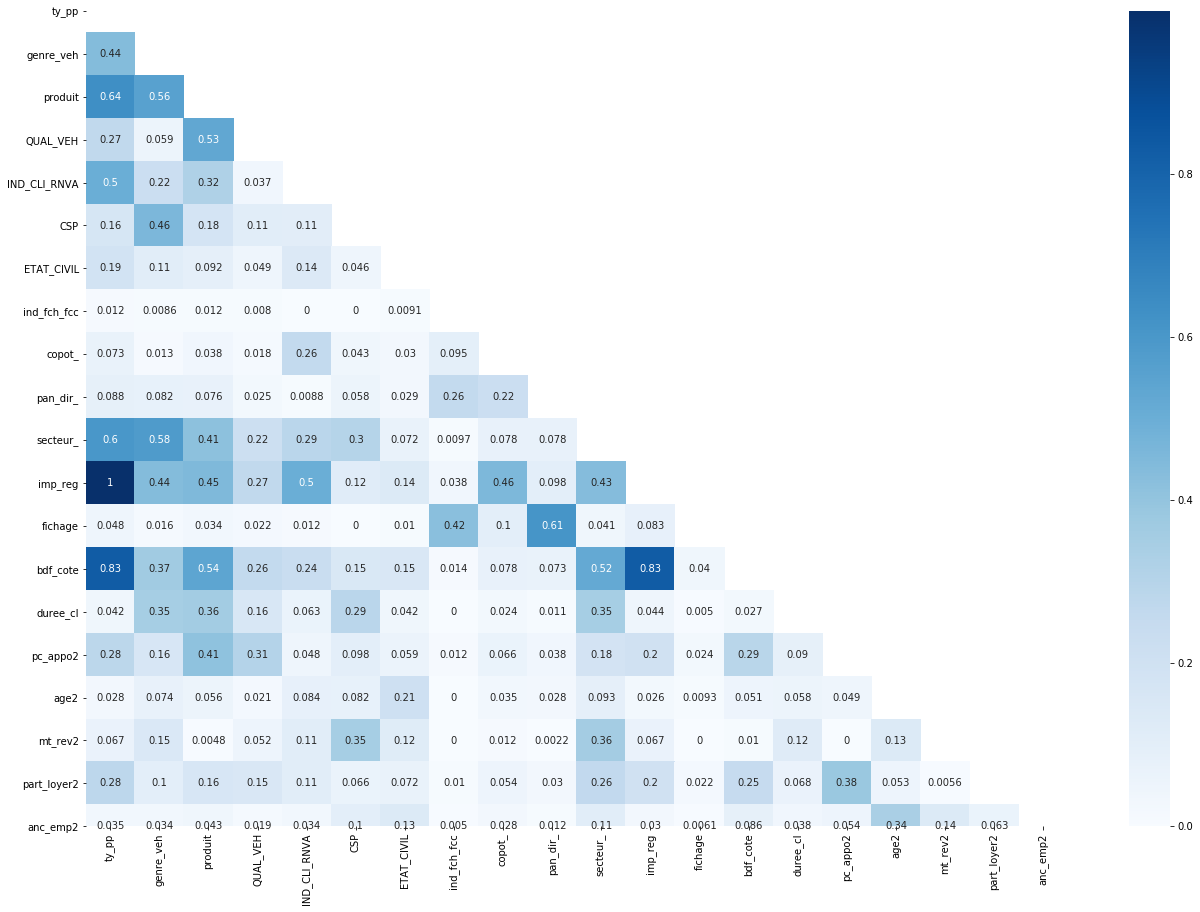

In [108]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cols = list(df.columns)
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
    


corr = pd.DataFrame(corrM, index=cols, columns=cols)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(22, 15))
ax = sns.heatmap(corr, annot=True, ax=ax,vmin=0,cmap="Blues",mask=mask);

In [109]:
df = df.drop('imp_reg', 1)
#df = df.drop('bdf_cote', 1)
#df = df.drop('produit', 1)
df = df.drop('ty_pp', 1)

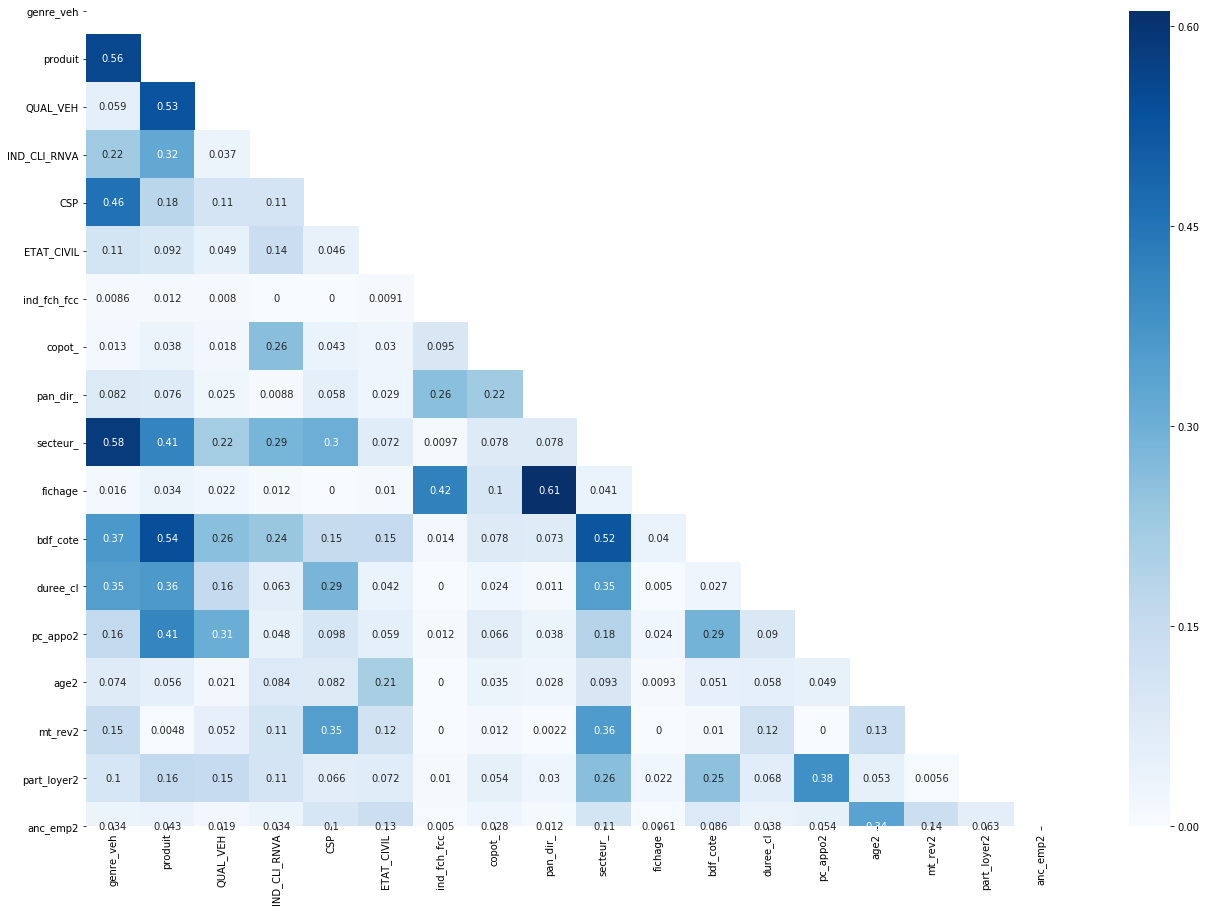

In [110]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cols = list(df.columns)
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
    


corr = pd.DataFrame(corrM, index=cols, columns=cols)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(22, 15))
ax = sns.heatmap(corr, annot=True, ax=ax,vmin=0,cmap="Blues",mask=mask);